## K-Means Algorithm - Iris

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')   # warnings 무시해라

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)

pca = PCA(2)    # n_components= :첫번째 값이라서 제외하고 써도됨
iris_pca = pca.fit_transform(iris_std)

#### 1. 군집화(Clustering)

In [4]:
from sklearn.cluster import KMeans
KMeans().get_params()       # 하이퍼 파라메타 확인하기

# 'n_clusters': 8, 기본값이 8개 => 해당 파라메타는 기본값은 무조건 설정해야함 /군집 중심점의 개수를 의미
# 중심점이 K개가 될 때까지, 2, 3번을 반복?

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [12]:
kmeans = KMeans(n_clusters=3, random_state=2023, n_init='auto')  
#  n_clusters : 군집의 갯수 
# 실행과정 보고 싶으면  verbose=1 옵션추가
#n_init:  초기 중심위치 시도 횟수
kmeans.fit(iris_std)        # 비지도 학습이므로 y값을 제공하지 않음

KMeans(n_clusters=3, n_init='auto', random_state=2023)

In [16]:
# 학습 결과
kmeans.labels_
#  n_clusters : 군집의 갯수 
# target : 0 - setosa, 1 - versicolor, 2 - virginica 의미
# cluster : 0,1,2 는 의미가 없는 임의의 수

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1])

In [15]:
# numvering은 임의로 부여
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2]), array([49, 55, 46], dtype=int64))

#### 2. 시각화

In [17]:
df = pd.DataFrame(iris_pca, columns=['PC1', 'PC2'])
df['target'] = iris.target
df['cluster'] = kmeans.labels_
df.head(54).tail()

,PC1,PC2,target,cluster
49,-2.203833,0.009216,0,0
50,1.101781,0.862972,1,1
51,0.731337,0.594615,1,1
52,1.240979,0.616298,1,1
53,0.407483,-1.754404,1,2


In [18]:
# 데이터 분포
df.groupby(['target', 'cluster'])[['PC1']].count()

PC1
target cluster     
0      0         49
       2          1
1      1         13
       2         37
2      1         42
       2          8

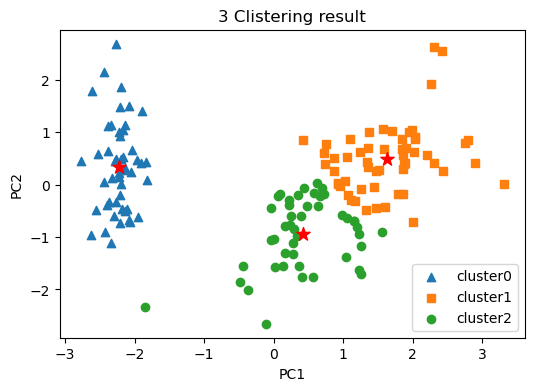

In [19]:
markers = ['^', 's', 'o']
plt.figure(figsize=(6,4))
for i,marker in enumerate(markers):
    x_data = df[df.cluster == i]['PC1']
    y_data = df[df.cluster == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i)) #데이터 뿌리기
    plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='red', s=100)   #중심점
plt.legend()
plt.xlabel('PC1'), plt.ylabel('PC2')
plt.title('3 Clistering result')
plt.show()